Data types before preprocessing:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    

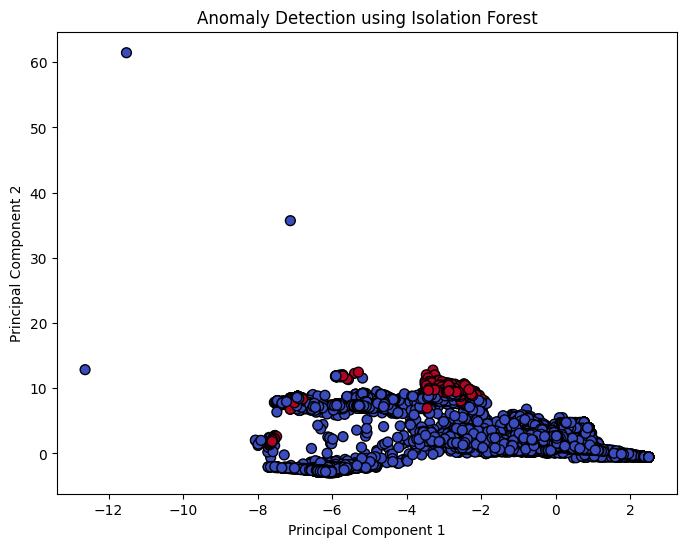

In [ ]:
# Add the src directory to the Python path
import sys
import os
sys.path.append('src')  # Go up one level to the root and then access src

# Import the necessary modules
import preprocess
import anomaly_detection as ad
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess data
data = preprocess.load_data('/data/kddcup.data/kddcup.data')
data_scaled = preprocess.preprocess_data(data)   # Preprocess the data (encode and scale)

# Step 2: Check data types (for debugging purposes)
print("Data types of features after preprocessing:")
print(data_scaled.dtypes)

non_numeric_columns = data_scaled.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 3: Split the data into training and test sets
X_train, X_test = train_test_split(data_scaled, test_size=0.1, random_state=42)

# Step 4: Train the anomaly detection model
model = ad.train_isolation_forest(X_train)

# Step 5: Predict anomalies in the test set
y_pred = ad.predict_anomalies(model, X_test)

# Step 6: Visualize the anomalies
ad.visualize_anomalies(X_test, y_pred)
